In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## 6.2 Preparing

In [2]:
from  data_loader import load_detrended_ssta
ssta, lon2, lat2, y, m  = load_detrended_ssta()

In [3]:
ssta = ssta[:, :, (1982 <= y)*(y <=2019)]
m = m[(1982 <= y)*(y <=2019)]
y = y[(1982 <= y)*(y <=2019)]

In [4]:
def draw_field(field, fig_title='SST anomalies', vmin =-6, vmax = 6, vint = 1):    
    plt.figure()
    cm = plt.get_cmap('seismic')
    cs = plt.contourf(lon2, lat2, field, \
                      cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
                      levels=np.arange(vmin, vmax+vint, vint), extend='both')
    plt.colorbar(cs)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    title = fig_title
    plt.xlim(0, 360)
    plt.ylim(-90, 90)
    plt.title(title)

In [5]:
def aave(west, east, south, north, var = ssta):
    var = var[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :, :]
    var = var[:, (south<=lat2[1, :])*(lat2[1, :]<=north), :]
    aave_var = np.nanmean(np.nanmean(var, 0), 0)
    return aave_var


def plot_2_mon_time(time_series1, time_series2, lower = -3, upper = 3, \
                  init_year=1982, fin_year=2020):
    mon = np.arange(1982, 2020, 1/12)
    plt.figure;
    plt.plot(mon, time_series1)
    plt.plot(mon, time_series2, 'r:')
    plt.plot(mon, 0*time_series1, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()
    

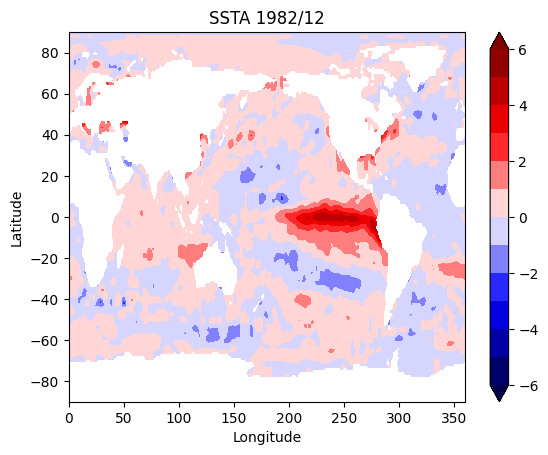

In [6]:
# El Niño 1982/12
draw_field(np.squeeze(ssta[:, :, (y==1982)*(m==12)]), 'SSTA 1982/12')

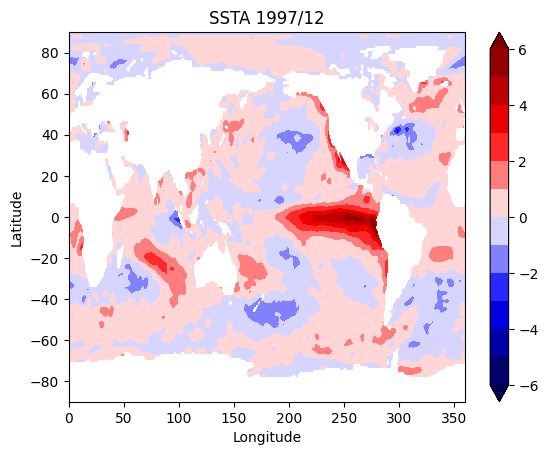

In [7]:
# El Niño 1982/12
draw_field(np.squeeze(ssta[:, :, (y==1997)*(m==12)]), 'SSTA 1997/12')

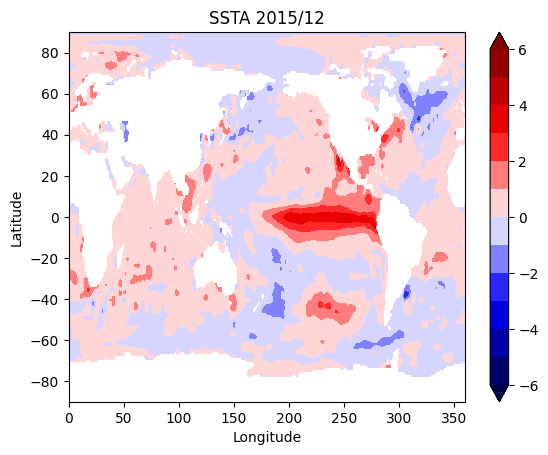

In [8]:
# El Niño 1982/12
draw_field(np.squeeze(ssta[:, :, (y==2015)*(m==12)]), 'SSTA 2015/12')

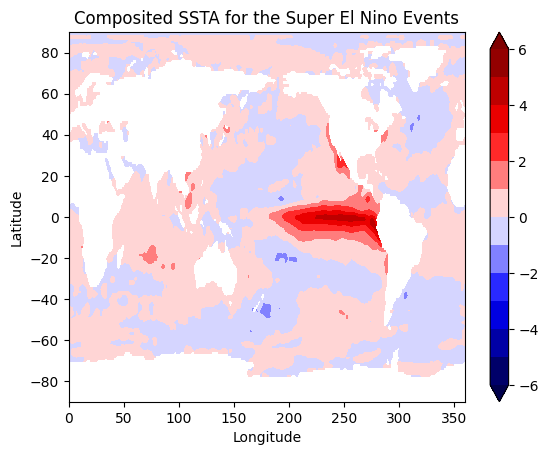

In [13]:
super_nino_data = ssta[:, :, ((y==1982)+(y==1997)+(y==2015))*(m==12)]

super_nino_composite = np.mean(super_nino_data, 2)

draw_field(super_nino_composite, 'Composited SSTA for the Super El Nino Events')

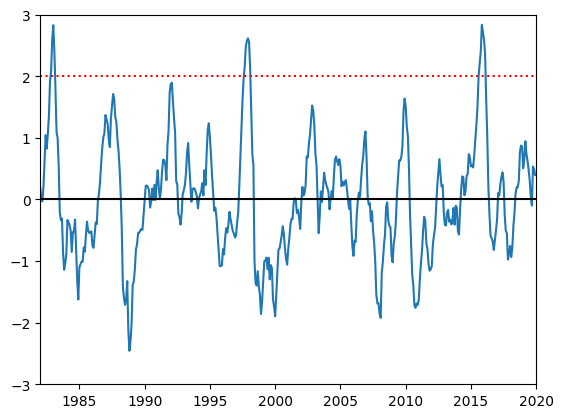

In [15]:
nino34 = aave(190, 240, -5, 5)
plot_2_mon_time(nino34, 2*np.ones(nino34.shape))

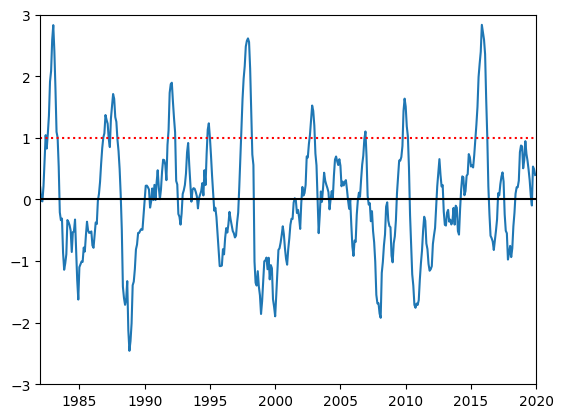

In [16]:
nino34 = aave(190, 240, -5, 5)
plot_2_mon_time(nino34, np.ones(nino34.shape))

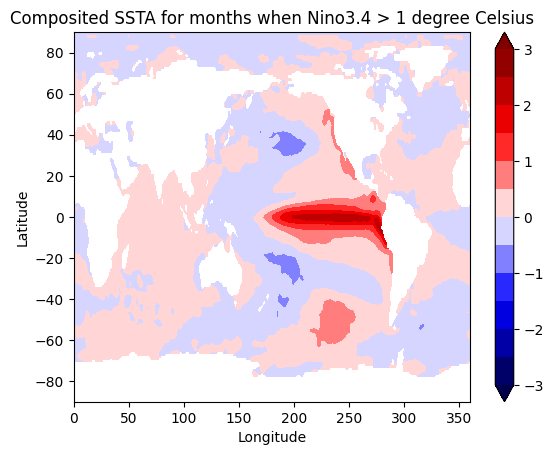

In [25]:
super_nino_data = ssta[:, :, (nino34>1)]

super_nino_composite = np.mean(super_nino_data, 2)

draw_field(super_nino_composite, 'Composited SSTA for months when Nino3.4 > 1 degree Celsius', \
          -3, 3, 0.5)